<h1><center>COMP1008: Exercise 3 - Regression with sklearn (<font color='red'>Extended</font>)</center></h1>

## Table of Content
* [Recap: linear regression in machine learning](#lr)
* [Tutorial: Linear regression with sklearn for Sales Prediction](#tutorial_lr) (<font color='red'>Step 5 extended<font>)
* [Mini-Challenge 2: weight-height project](#mini2)
* [Tutorial: Regression with ANN](#tutorial_ann) - (<font color='red'>New section</font>)

Linear regression is a common supervised learning algorithm for regression tasks. This algorithm learns to model the (linear) correlations between the input variables and the output variable in a given dataset. `scikit-learn` is a powerful machine learning library in Python that provides a user-friendly and effective approach to implement linear regression with just a few lines of code.

<div class="alert alert-success">
    <h3>Mini-Challenge 2: Linear Regression and Visualisation</h3>
</div>

Upon completing the guided tutorial on linear regression, you are challenged in Part 3 to build a linear regression model using `scikit-learn` to predict the heights of people based on their weight with a set of real-world data `data-weight-height.csv`.

<a id="lr"></a>
## 1. Recap: linear regression in machine learning

<b>Supervised learning</b> is one type of machine learning tasks that learne a function that maps the input (i.e. features) to an expected output (i.e. label) with given data (i.e. samples of input-output pairs). COMP1008 covers two main types of supervised learning:
- <b>Regression</b>: the output/label is continuous,
- <b>Classification</b>: the output/label is discrete/categorical.

<img align="right" width=280 src="img/img-lr.png"><br>

<b>Linear regression</b> is fast to train and easy to use, requiring little parameter tuning. It is also easy to interpret compared to other models such as artificial neural networks. Training a linear regression model involves learning the coefficients (<b><i>intercept</i> $b_0$</b> and <b><i>coefficient</i> $b_i$</b>) of the following function that maps the <b><i>input x (features)</i></b> to <b><i>output y (label)</i></b> in the training data.
- For a single variable, the function is <b><i>y</i></b> = $b_0$ + $b_1$ * <b><i>x</i></b> (see the figure to the right)<br>
- For multiple variables, the function is <b><i>y</i></b> = $b_0$ + $b_1$ * <b><i>x<sub>1</sub></i></b> + $b_2$ * <b><i>x<sub>2</sub></i></b> + ...

The most common linear regression involves finding the best-fit straight line that minimises the mean squared errors (MSE), i.e. difference between the given data points and the corresponding points on the regression line.

## 2. Tutorial: Linear regression with sklearn for Sales Prediction <a class="anchor" id="tutorial_lr"></a>

We usually use the following steps in building machine learning models:
1. Data pre-processing.
2. Splitting data into two disjoint sets of `training` data and `testing` data.
3. Building the model and training it using the `training` data.
4. Validating the model by evaluating its performance using the `testing` data.
5. Improve the model by analysing its performance. If needed go back to step 1 or 2.

In [1]:
# import Python's standard libraries
import pandas as pd # data preparation
import numpy as np # data operation
import matplotlib.pyplot as plt # data visualisation

In this below example of predicting the sales, `Sales` would be our output, and input features (in thousands dollars) are the advertising spent on `TV`, `Radio` and `Newspaper`.

In [2]:
adv_df = pd.read_csv("data-Advertising.csv")
adv_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Text(0, 0.5, 'Sales')

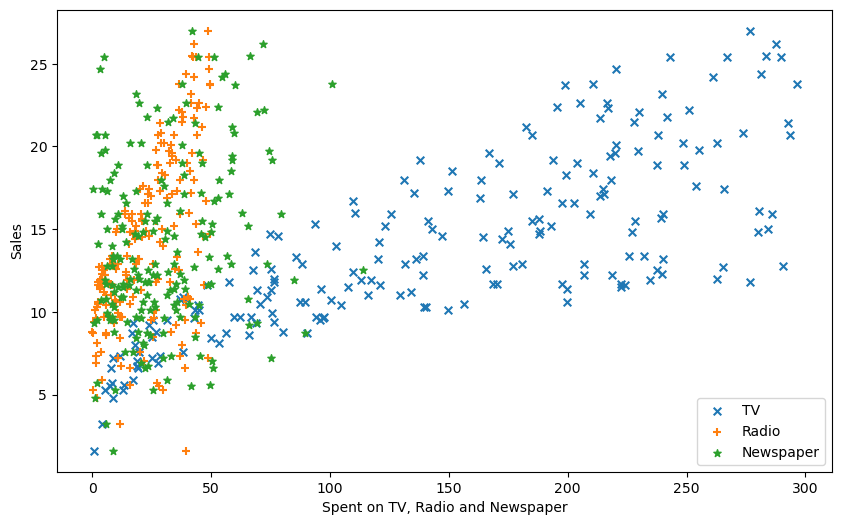

In [3]:
# using 'matplotlib' scatter plot
plt.figure(figsize=(10,6))
plt.scatter(x = adv_df['TV'], y = adv_df['Sales'], s=30, marker='x')
plt.scatter(x = adv_df['Radio'], y = adv_df['Sales'], s=30, marker='+')
plt.scatter(x = adv_df['Newspaper'], y = adv_df['Sales'], s=30, marker='*')
plt.legend(['TV', 'Radio', 'Newspaper'])
plt.xlabel('Spent on TV, Radio and Newspaper')
plt.ylabel('Sales')

### Step 1. Getting the data ready for machine learning

Data preprocessing is improtant to construct successful machine learning models. This includes removing missing values and  outliers. We've looked at this in the previous tutorial and exercise. Good news is there is no missing value in this dataset, shown as below.

In [4]:
adv_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

From the below we can see that values of data range between 0, and 296.4. In linear regression, it's important to scale the data into the same range; otherwise it'll be difficult to tell the importance of the features in the trained models. See more details of analysis on the learned coefficients in Step 3.

In [5]:
adv_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<img align="right" width=200, src="img/feature_scaling.png" style="padding-left:1rem;">

The ranges of values for input features `TV`, `Radio` and `Newpaper` are quite different. The linear model (i.e. the coefficients) learned on these different ranges won't reflect the actual importance of these inputs to the model. We need to scale each of these features into range [0,1] so the coefficients are comparable.

In [6]:
from sklearn import preprocessing

x = adv_df.values # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler() # create an scaler object
x_scaled = min_max_scaler.fit_transform(x) # normalise using the scaler
adv_df = pd.DataFrame(x_scaled, columns=adv_df.columns) # store back as a pandas Dataframe
adv_df.head()

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882


In [7]:
adv_df_input = adv_df.drop(columns=['Sales']) # prepare the input data: three features
adv_df_output = adv_df['Sales'] # prepare the output data: task of predicting Sales

### Step 2: split training and testing sets
<img align="right" width=300, src="img/train-and-test-datasets.png" style="padding-left:1rem;">

`sklearn` provides a module called `train_test_split` to randomly split data into training and test sets thus to minimise the potential bias brought by manually partitioning the data.
- The <b>training set</b> is used for building and tuning the model
- The <b>test set</b> should not be used in training, but used as unseen new data to evaluate the actual performance of the trained model

In [78]:
# import the scikit-learn module "model_selection" 
from sklearn.model_selection import train_test_split

# prepare the training and testing datasets by a ratio of 70:30, with parameter `test_size`
x_train, x_test, y_train, y_test = train_test_split(adv_df_input, adv_df_output, test_size = 0.3, random_state=1)

**Note:** Some `scikit-learn` methods use randomness, e.g. `train_test_split()` shuffles the data before the split. Running the same code multiple times will result in <b>different outputs</b>.

It is strongly recommended that you set the `random_state` parameter in your coursework with a 'seed' for the underlying random number generator; otherwise you may generate different results to what you have just written an analysis about! Your results are also reproducible for someone else. Reproduciblity is an important aspect of reporting scientific results.

### Step 3: model training with the training data
The `fit()` method in the imported `LinearRegression` module trains the model with our <b>training data</b> as arguments.

In [79]:
# import the scikit-learn module "linear_model" to build / train / fit the model
from sklearn.linear_model import LinearRegression

# instantiate the linear regression algorithm
lr = LinearRegression() 

# the `fit` method trains the algorithm with the training data prepared in Step 2
lr.fit(x_train, y_train) 

LinearRegression()

<img align="right" width=230, src="img/img-mse.png">
<img align="right" width=230 src="img/img-lr.png">

The linear regression training algorithm `fit` learns the optimal intercept and slope (coefficients) in a regression line that best fits the training data.

We can print these learned values as below, and interpret the trained model as follows: 0.54, 0.34 and 0.008 units increase of advertising spent on `TV`, `Radio` and `Newspaper` leads to 1 unit of increase in Sales. Avertising on `Newspaper` contributes almost nothing to the `Sales`. By comparing the coefficents of the three input features, we can conclude that avertising on TV is more important than that of Radio.

<b>Note</b>: Negative coefficient suggests an inverse relationship between that input feature and the output, e.g. a unit increase of the input feature leads to some units of decrease of the output. A larger negative coefficient (i.e. high absolute va;ue) suggests a stronger inverse relationship. This is also useful in building good linear regression models.

In [80]:
print('Coefficient/slope:',lr.coef_)
print('Intercept:',lr.intercept_)

Coefficient/slope: [0.54660317 0.3448302  0.00828646]
Intercept: 0.05396210685528441


In practice, the company should stop advertising on Newspapers. In building the linear regression model, we should remove this input feature, as it's not useful and incurrs unnessary computing cost in the training. Without the scaling in Step 1, it would be difficult to compare the importance of these input features! 

In [81]:
print('The linear regression function learned is: Sales =', lr.intercept_, '+', lr.coef_[0], '* TV', 
      '+', lr.coef_[1], '* Radio', '+', lr.coef_[2], '* Newspaper')

The linear regression function learned is: Sales = 0.05396210685528441 + 0.5466031702811375 * TV + 0.34483020430320555 * Radio + 0.008286461903860232 * Newspaper


<font color='red'><b>Note</b>: As there are three input features, it's impossible to visualise their relationship with the output label `Sales`. We can only visualise the regression line between one input feature and the output label, or the regression plane between two input features and the output label. Plotting the plane / surface is not required in COMP1008.</font>

### Step 4: test / evaluation on testing data
The `metrics` module in `sklearn` provides method to calculate the `mean_squared_error` MSE between the predictions and the true labels.

In [82]:
# import the scikin-learn module "metrics" to evaluate the trained model on the test dataset
from sklearn import metrics

# Predict using the linear model on the testing data (input) prepared in Step 1
y_pred = lr.predict(x_test)

# Calculate the model performance, i.e. predicted output vs. actual output of test data prepared in Step 1
print(metrics.mean_squared_error(y_test, y_pred))

0.0029898395862523533


Is this a "good" (low enough) MSE value?<br>
It's hard to say, as it depends on the domain (range of `Sales` values). MSE is most useful to compare different models. We can compare this model `lr` with another model in Step 5.

<img align="right" width=400, src="img/img-kfolds.png">

<b>K-fold cross-validation</b> is a resampling method to evaluate machine learning models. It partitions the dataset into <i>k</i> parts for <i>k</i> runs of training. In each of the <i>k</i> runs, (<i>k</i>-1) partitions are used to train the model, and the remaining one partition is used to test the trained model.

The overall average performance of the <i>k</i> testings, instead of just a single train/test split, provides more accurate evaluation on the trained model, and thus a better indication of the model's performance on new unseen data.

The `cross_val_score` method in `sklearn` trains and tests a model over multiple folds of the data in a "pipeline". There is no need to manually partition the data. We just need to define <i>k</i> by parameter `cv`, send the whole input data X and outoput y to `cross_val_score`, and provide the metric by parameter `scoring`. Note: in the sklearn `cross_val_score` method, the score is calculated as a negative value. We can simply negate the score to obtain the MSE.

In [13]:
from sklearn.model_selection import cross_val_score

lr1 = LinearRegression()

# conduct and calculate k MSE scores for the k cross validations
cross_val_score(lr1, adv_df_input, adv_df_output, cv=5, scoring='neg_mean_squared_error')

array([-0.00486165, -0.00375979, -0.0024571 , -0.00841056, -0.00432628])

In [14]:
# calculate the mean of the k runs
cross_val_score(lr1, adv_df_input, adv_df_output, cv=5, scoring='neg_mean_squared_error').mean()*-1

0.004763076751658829

### Step 5: improve the model based on analysis (<font color='red'>This section has been extended!</font>)

Linear regression is usually reliable. There is usually less scope to improve the model by tuning the parameter. However, we can see that the scores from each of the <i>k</i> runs could be quite different, meaning the performance depends very much on how the data is partitioned. How would you resolve this issue?

<b>Feature selection</b> is also important in data preparation. Let's look at another model with only the most important single feature/input in this example.

In [15]:
simple_adv_df = adv_df_input['TV'] # slice the most important feature for the model
simple_adv_df.shape

(200,)

sklearn's `LinearRegression` model requires the <b>input data</b> to be a <b>2D array</b> (n_samples, n_features), i.e. each row represents a sample, and each column represents a feature. `simple_adv_df` is 1D. We can convert it by adding an additional dimension.

In [16]:
simple_adv_df = adv_df_input[['TV']] # method 1: use [[]]
simple_adv_df.shape

(200, 1)

In [17]:
simple_adv_df = adv_df_input['TV']
simple_adv_df = np.expand_dims(simple_adv_df, axis=1) # method 2: numpy method expand_dims
simple_adv_df.shape

(200, 1)

In [18]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(simple_adv_df, adv_df_output, test_size = 0.3, random_state=1)

In [19]:
# instantiate the linear regression algorithm
simple_lr = LinearRegression() 

# the `fit` method trains the algorithm with the training data prepared in Step 2
simple_lr.fit(x_train_s, y_train_s) 

LinearRegression()

In [20]:
print('Coefficient/slope:',simple_lr.coef_[0],'; Intercept:',simple_lr.intercept_)
print('The linear regression function learned: Sales =', simple_lr.intercept_, '+', simple_lr.coef_[0], '* TV')
print('This means', simple_lr.coef_[0], 'unit of increase of advertising spent on TV leads to one unit increase in Sales.')

Coefficient/slope: 0.5602239255664735 ; Intercept: 0.2109135813070525
The linear regression function learned: Sales = 0.2109135813070525 + 0.5602239255664735 * TV
This means 0.5602239255664735 unit of increase of advertising spent on TV leads to one unit increase in Sales.


In [21]:
y_pred = simple_lr.predict(x_test_s)
print(metrics.mean_squared_error(y_test_s, y_pred))

0.016385171794061865


<b>Question</b>: The MSE of `simple_lr` is much higher than that of `lr` and `lr1` we trained above! Why is this?

Text(0, 0.5, 'Sales')

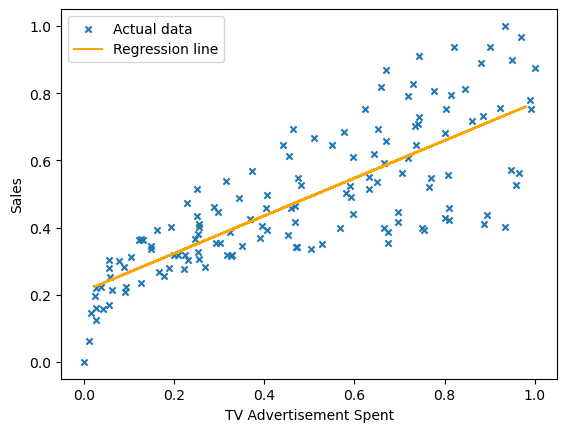

In [22]:
# visualise the line that best fits the example dataset.
plt.scatter(x_train_s, y_train_s, marker="x",s=20) # training data points
plt.plot(x_test_s, y_pred, color='orange') # linear regression model
plt.legend(['Actual data','Regression line'])
plt.xlabel('TV Advertisement Spent')
plt.ylabel('Sales')

<a id="mini2"></a>
## 3. Mini-Challenge 2: weight-height project

<div class="alert alert-success">
    <h3>Mini-Challenge (Submit to Moodle!)</h3>
</div>

The `data-weight-height.csv` file contains the height and weight of 10,000 individuals of 18 years old. Your challenge is to implement a linear regression model with this data to predict the heights of men or women with their weights.

Once you have completed all the following tasks in the mini-challenge, you should submit your plot from Task 5.2 to Moodle for "Mini-challenge 2"

***This challenge is good practice for your coursework. The class will receive anonymised feedback at a lecture based on everyone's responses.***

### Step 0: Import requried libraries

You will need `pandas` and `sklearn` libraries to build a linear regression model, maybe also `matplotlib` to visualise the results.

In [23]:
#Your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

### Step 1: Pre-process the data

<b>Task 1.1</b> is to import the data file from your folder with pandas and store it in a pandas Dataframe called `df`.

In [26]:
path_to_file = "data-weight-height.csv"
df = pd.read_csv(path_to_file)
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<b>Task 1.2</b> is to create two new dataframes, `df_m` and `df_f`, to store samples with values of `Male` and `Female` in the `Gender` column, respectively.

Hint: Pandas can easily slice columns by referring to column's name i.e. `df['column']` or with a condition, i.e. `df[df['column']=='value']`. Refer to Exercise 1 if needed.

In [35]:
df_m = df[df["Gender"] == "Male"]
df_f = df[df["Gender"] == "Female"]

df_f

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


Then visualize and observe the relationship between weight and height for males and females in the dataset.

Text(0.5, 1.0, 'Weight vs. Height: Men vs. Women')

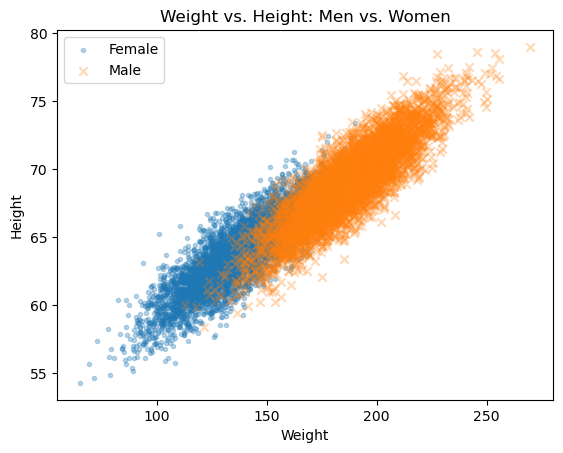

In [49]:
# in matplotlib, later plot is added on top of the previous ones, automatically distinguished with different colors
plt.scatter(df_f['Weight'], df_f['Height'], marker=".", alpha=0.3)
plt.scatter(df_m['Weight'], df_m['Height'], marker="x", alpha=0.3)
plt.legend(['Female','Male'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs. Height: Men vs. Women')

Data preprocessing may involve handling missing values, transforming variables, or scaling the data. In this example, the data has already been preprocessed, so now ready for building the machine learning model.

### Step 2: Split the data

<b>Task 2.1</b> is to split the data `df_f` into input variables `X_f` and output variables `y_f`. The aim is to predict the heights of women or men using their weights. So `Weight` will be the input variable, and `Height` the output variable.

Hint: The input variables should be stored in a 2D array, and the output variables should be stored in a 1D array. 

In [50]:
X_f = df[["Weight"]]
y_f = df["Height"]


<b>Task 2.2</b> is to split the data into training and test sets with `train_test_split()` method.

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X_f,y_f,test_size=0.3,random_state=True)

### Step 3: Build a linear regression model

In [54]:
lr2 = LinearRegression()

lr2.fit(X_train,y_train)

LinearRegression()

### Step 4: Evaluate performance of the model with test data

In [58]:
# Your code here
y_pred = lr2.predict(X_test)

# Calculate the model performance, i.e. predicted output vs. actual output of test data prepared in Step 1
print(metrics.mean_squared_error(y_test, y_pred))


2.11041241156558


### Step 5: Analyse and improve if needed

<b>Task 5.1</b> Print the linear function learned between weight and height using the female weight-height data.

In [59]:
print('The linear regression function learned for female (weight vs. height) is y = ',lr2.intercept_," + ", lr2.coef_, "x " )



The linear regression function learned for female (weight vs. height) is y =  48.58639288865985  +  [0.11023713] x 


<b>Task 5.2</b>: Visualise the relationship between weight and height for females in the dataset. Include a line plot of the regression function in the same plot.

Text(0, 0.5, 'Height(inch)')

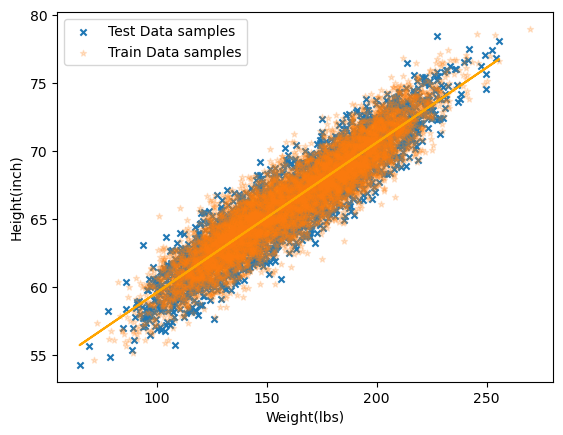

In [73]:
plt.scatter(X_test, y_test, marker="x",s=20) # training data points
plt.scatter(X_train,y_train,marker="*",alpha = 0.2,s=20)
plt.plot(X_test,
    y_pred, color='orange') # linear regression model
plt.legend(['Test Data samples',"Train Data samples"])
plt.xlabel('Weight(lbs)')
plt.ylabel('Height(inch)')

<div class="alert alert-info">
    <h3>Task 6: Build the linear regression model with Cross Validation</h3>
</div>

Build a linear regression model for predicting the height of a `Male` using his weight, using the cross-validation approach.

In [75]:
# You code here
from sklearn.model_selection import cross_val_score

lr1 = LinearRegression()

modI = df_m["Weight"].to_numpy().reshape(-1,1)

cross_val_score(lr1, modI , df_m["Height"], cv=5, scoring='neg_mean_squared_error',error_score="raise")


array([-2.30040799, -1.9947553 , -2.14810664, -2.03903444, -1.98615205])

<div class="alert alert-warning">
    <h4>Optional Task</h4>
</div>
Is the linear regression model good at predicting the weight if given the height? Show the results to support your answer.<br>
(Hint: How does the MSE compare to the range of weight?)

In [ ]:
# You code here



<a id="tutorial_ann"></a>
## 4. Regression with ANN <font color='red'>This is a new section!</font>

ANN can deal with tasks where the output is either discrete / categorical (classifcation) or continious (regression). We just need to import the corresponding sklearn library, i.e. `MLPRegressor` for regression and `MLPClassifier` for classification tasks.

The output of the Avertise dataset is continious. We can also use ANN for this regression task.

In [76]:
from sklearn.neural_network import MLPRegressor

In [125]:
# build a ANN regression model
mlp = MLPRegressor(hidden_layer_sizes=(20,60), max_iter=9000, random_state=1) # MLPRegressor uses some randomness too!
# train the model with the prepared training data (input features, i.e. TV, Radio and Newspaper, against output labels Sales)
mlp.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=(20, 60), max_iter=9000, random_state=1)

This is a very small dataset, so training time of even 8000 iterations is not noticable. For large datasets ANN usually takes much longer and may not converge!

You could try different ANN parameters (e.g. different no. of layers, no. of neurons on each layer, training epochs) and observe its different performance.

In [126]:
mlp_y_predict = mlp.predict(x_test) # use the trained ANN to predict labels for the test data
# calculate the accuracy: compare the true labels (y_test) with the predicted labels (y_predict)
print('Testing accuracy: \t', metrics.mean_squared_error(y_test, mlp_y_predict))

Testing accuracy: 	 0.0011277491856918386


<div class="alert alert-success">
    <h2>🍰 End</h2> 
</div>